In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 14)

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64


In [6]:
for col in df.select_dtypes(include='boolean').columns:
    print(df[col].value_counts())

road_signs_present
False    259289
True     258465
Name: count, dtype: int64
public_road
True     260045
False    257709
Name: count, dtype: int64
holiday
True     260688
False    257066
Name: count, dtype: int64
school_season
False    260164
True     257590
Name: count, dtype: int64


In [7]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [8]:
df.isnull().mean()*100

id                        0.0
road_type                 0.0
num_lanes                 0.0
curvature                 0.0
speed_limit               0.0
lighting                  0.0
weather                   0.0
road_signs_present        0.0
public_road               0.0
time_of_day               0.0
holiday                   0.0
school_season             0.0
num_reported_accidents    0.0
accident_risk             0.0
dtype: float64

In [9]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [10]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [11]:
# for col in num_cols:
#     plt.figure(figsize=(10,12))
#     plt.subplot(221)
#     sns.distplot(df[col])
#     plt.subplot(222)
#     sns.boxplot(df[col])

In [12]:
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower,upper=Q1-IQR*1.5,Q3+IQR*1.5
    df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df
df=remove_outliers(df,'accident_risk')

In [13]:
df.drop(columns=['id'],inplace=True)

<Axes: xlabel='accident_risk'>

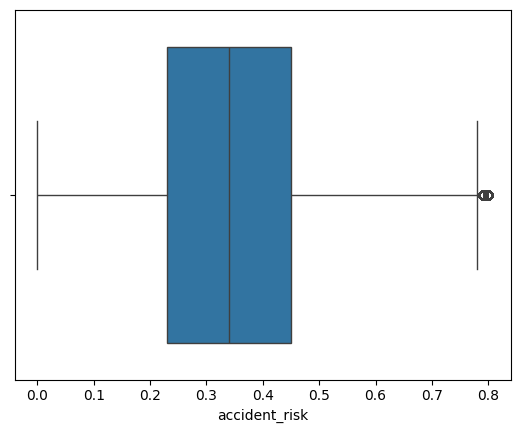

In [14]:
sns.boxplot(x=df['accident_risk'])

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
x = df.drop(columns=['accident_risk'])
y = df['accident_risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
ohe_cols=['road_type','lighting','weather','time_of_day']
oe_cols=['road_signs_present','public_road','holiday','school_season']

In [18]:
speed_limit_trf=(
    'speed_limit_trf',Pipeline([
        ('scaling',StandardScaler())
    ]),['speed_limit']
)
ohe_trf=(
    'ohe_',Pipeline([
        ('ohe_trf',OneHotEncoder(handle_unknown='ignore'))
    ]),ohe_cols
)
oe_trf=(
    'oe_',Pipeline([
        ('oe_trf',OrdinalEncoder())
    ]),oe_cols
)

In [19]:
transformer=ColumnTransformer(transformers=[speed_limit_trf,ohe_trf,oe_trf],remainder='passthrough')

In [20]:
pipe=Pipeline([('transformer',transformer)])

x_train_trf=pipe.fit_transform(x_train)
x_test_trf=pipe.transform(x_test)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt

In [22]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(hp.Choice('layer_units',[8,16,32]),activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='huber',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [23]:
objective=kt.Objective('val_root_mean_squared_error',direction='min')
tuner=kt.RandomSearch(build_model,objective=objective,max_trials=3,directory='my_dir',project_name='accident_risk')

In [24]:
tuner.search(x_train_trf,y_train,epochs=5,validation_data=(x_test_trf,y_test))

Trial 3 Complete [00h 01m 50s]
val_root_mean_squared_error: 0.05673100799322128

Best val_root_mean_squared_error So Far: 0.05673100799322128
Total elapsed time: 00h 06m 07s


In [25]:
model=tuner.get_best_models(num_models=1)[0]

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
tuner.get_best_hyperparameters()[0].values

{'layer_units': 32}

In [30]:
model.fit(x_train_trf,y_train,epochs=50,initial_epoch=5,validation_data=(x_test_trf,y_test))

Epoch 6/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0575 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0571
Epoch 7/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0575 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0568
Epoch 8/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0573 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0571
Epoch 9/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0573 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0570
Epoch 10/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0572 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0565
Epoch 11/50
12860/12860 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0571 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0569
Epoch 12/50
12860/12

In [32]:
from sklearn.metrics import root_mean_squared_error

y_pred=model.predict(x_test_trf)
root_mean_squared_error(y_test,y_pred)

3215/3215 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step


0.05638436939550894

In [34]:
test=pipe.transform(test)

In [36]:
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = model.predict(test)
submission = y_test_sub.copy()
submission['accident_risk'] = test_preds
submission.to_csv('final_submission_ann.csv', index=False)
print("Successfull!")

5394/5394 ━━━━━━━━━━━━━━━━━━━━ 3s 549us/step
Successfull!
